In [ ]:
# 01-coffee-milk

In [ ]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("answers.csv")
df.head()

,Отметка времени,Кофе или чай?,Пол,Занимаетесь спортом?,Есть ли работа?,Есть ли сердечные заболевания?,Сова или Жаворонок,Есть ли молоко в холодильнике?,Время подъема,Административный округ,Время сна
0,19.09.2023 20:23:16,Чай,М,Да,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
1,19.09.2023 20:25:03,Кофе,Ж,Нет,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
2,19.09.2023 20:26:31,Чай,М,Нет,Да,Нет,Жаворонок,Да,6-7 утра,Восточный административный округ,От 3 до 6 часов
3,19.09.2023 20:27:02,Чай,М,Да,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
4,19.09.2023 20:27:16,Чай,Ж,Да,Да,Нет,Сова,Да,Позднее 8 утра,Восточный административный округ,Более 8 часов


In [ ]:
# Словари для преобразование периодов времени
r={'5-6 утра':5.5,'6-7 утра':6.5,'7-8 утра':7.5,'Позднее 8 утра':8.5}
s={'Менее 3 часов':3,'От 3 до 6 часов':5,'7-8 часов':7.5,'Более 8 часов':8.5}

def transform_data(x):
    if x in r.keys():
        return r[x]
    elif x in s.keys():
        return s[x]
    else:
        return x

df = df.drop('Отметка времени', axis=1)

most_common_district = df['Административный округ'].mode()[0]
df['Административный округ'] = df['Административный округ'].fillna(most_common_district)

df = pd.get_dummies(df, columns=['Пол', 'Занимаетесь спортом?', 'Есть ли работа?', 'Есть ли сердечные заболевания?', 'Сова или Жаворонок', 'Есть ли молоко в холодильнике?', 'Кофе или чай?', 'Административный округ'])

df = df.applymap(transform_data)

df.head()

,Время подъема,Время сна,Пол_Ж,Пол_М,Занимаетесь спортом?_Да,Занимаетесь спортом?_Нет,Есть ли работа?_Да,Есть ли работа?_Нет,Есть ли сердечные заболевания?_Да,Есть ли сердечные заболевания?_Нет,...,Кофе или чай?_Чай,Административный округ_Восточный административный округ,Административный округ_Подмосковье,Административный округ_Северный административный округ,Административный округ_Северо-Восточный административный округ,Административный округ_Северо-западный административный округ,Административный округ_Центральный административный округ,Административный округ_Юго-Восточный административный округ,Административный округ_Юго-Западный административный округ,Административный округ_Южный административный округ
0,8.5,7.5,0,1,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
1,8.5,7.5,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,6.5,5.0,0,1,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,8.5,7.5,0,1,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
4,8.5,8.5,1,0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Кофе или чай?_Кофе', axis=1)
y = df['Кофе или чай?_Кофе']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Размер обучающего набора:", len(X_train))
print("Размер тестового набора:", len(X_test))

Размер обучающего набора: 32
Размер тестового набора: 9


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# На рендже 1..40 соседей оцениваем производительность каждой модели с помощью кросс-валидации
# cv - блоки для кросс-валидации
param_grid = { 'n_neighbors': range(1, 25) }
grid_search = GridSearchCV(knn, param_grid, cv=9, error_score='raise')
grid_search.fit(X_train, y_train)

print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение точности: ", grid_search.best_score_)

Наилучшие параметры:  {'n_neighbors': 3}
Наилучшее значение точности:  0.787037037037037


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Точность на тестовом наборе данных: ", accuracy)

Точность на тестовом наборе данных:  0.5555555555555556


Text(95.72222222222221, 0.5, 'Actual')

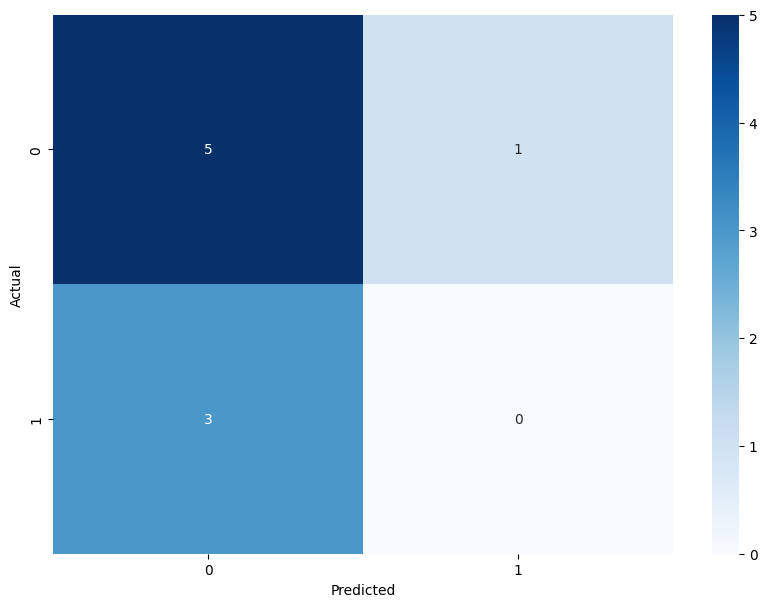

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')